# Upwelling Transmittance Test

Test to visualize the upwelling transmittance obtained in 6S. 

**MAKE SURE TO ADAPT 6S TO OUTPUT *UPWELLING TRANSMITTANCE $tds$ AS UNDERLIGHT BEFORE RUNNING***

In [1]:
# Load modules
import numpy as np
from Py6S import *
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
# General settings
wavelength = 0.550
wind_speed = 40
wind_direction = 90
salinity = 34.3
pigmentation = 0.3

In [3]:
# Run 6S
view_azimuth = 180
view_zeniths = np.arange(0, 91, 45)

def run_sixs(azimuth, zenith):
    # SixS Parameters
    s = SixS()
    s.wavelength = Wavelength(wavelength)
    s.atmos_profile = AtmosProfile.PredefinedType(AtmosProfile.NoGaseousAbsorption)
    s.aero_profile = AeroProfile.PredefinedType(AeroProfile.NoAerosols)
    s.ground_reflectance = GroundReflectance.HomogeneousOcean(wind_speed, wind_direction, salinity, pigmentation)

    # Set view parameters
    s.geometry = Geometry.User()
    s.geometry.solar_a = 0
    s.geometry.solar_z = 45
    s.geometry.view_a = azimuth
    s.geometry.view_z = zenith

    # Run the simulation
    s.run()
    water = s.outputs.values['water_component_water']

    return water

In [4]:
upwelling_transmittances = []
progress = tqdm(total=len(view_zeniths))

for view_zenith in view_zeniths:
    water = run_sixs(view_azimuth, view_zenith)
    upwelling_transmittances.append(water)
    progress.update(1)
progress.close()

100%|██████████| 3/3 [00:00<00:00,  3.55it/s]


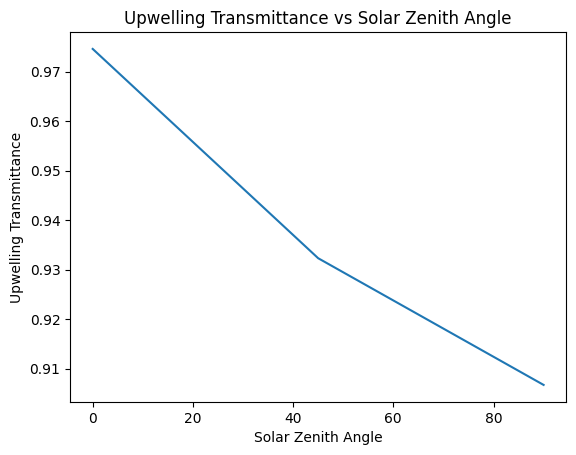

In [5]:
# Plot the downwelling transmittance 
plt.plot(view_zeniths, upwelling_transmittances)
plt.xlabel('Solar Zenith Angle')
plt.ylabel('Upwelling Transmittance')
plt.title('Upwelling Transmittance vs Solar Zenith Angle')

plt.show()

Running simulation over hemisphere...
    # of outgoing azimuths: 2
    # of outgoing zeniths: 10
    Lenght of results: (2, 10)


100%|██████████| 20/20 [00:05<00:00,  3.55it/s]


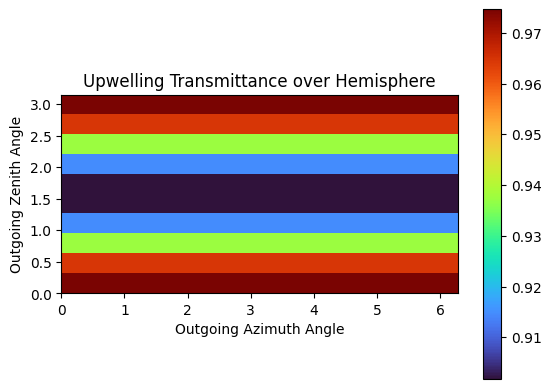

In [6]:
def run_hemisphere():
    # Run test over hemisphere
    res = 1
    outgoing_azimuths = np.linspace(0, 360, 2 * res)
    outgoing_zeniths = np.linspace(0, 180, 10 * res)

    solar_azimuth = 0
    solar_zenith = 45
    results = np.zeros((len(outgoing_azimuths), len(outgoing_zeniths)))

    print('Running simulation over hemisphere...')
    print(f'    # of outgoing azimuths: {len(outgoing_azimuths)}')
    print(f'    # of outgoing zeniths: {len(outgoing_zeniths)}')
    print(f'    Lenght of results: {results.shape}')

    progress = tqdm(total=len(outgoing_azimuths) * len(outgoing_zeniths))
    azim_idx = 0
    for azimuth_o in outgoing_azimuths:
        zenith_idx = 0
        for zenith_o in outgoing_zeniths:
            s = SixS()
            s.wavelength = Wavelength(wavelength)
            s.atmos_profile = AtmosProfile.PredefinedType(AtmosProfile.NoGaseousAbsorption)
            s.aero_profile = AeroProfile.PredefinedType(AeroProfile.NoAerosols)
            s.ground_reflectance = GroundReflectance.HomogeneousOcean(wind_speed, wind_direction, salinity, pigmentation)

            # Set view parameters
            s.geometry = Geometry.User()
            s.geometry.solar_a = solar_azimuth
            s.geometry.solar_z = solar_zenith
            s.geometry.view_a = azimuth_o
            s.geometry.view_z = zenith_o
            s.run()
            water = s.outputs.values['water_component_water']
            results[azim_idx, zenith_idx] = water
            progress.update(1)
            zenith_idx += 1
        azim_idx += 1
    progress.close()
    return results

data = run_hemisphere().T

# Plot heatmap
plt.imshow(data, extent=[0, 2 * np.pi, 0, np.pi], origin='lower')
plt.ylabel('Outgoing Zenith Angle')
plt.xlabel('Outgoing Azimuth Angle')
plt.title('Upwelling Transmittance over Hemisphere')

# Set turbo colormap
plt.set_cmap('turbo')

plt.colorbar()

plt.show()